In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)


In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | eyl
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | dubbo
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | okha
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | batemans bay
Processing Record 14 of Set 1 | daxian
City not found. Skipping...
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | nyzhnya duvanka
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | lambarene
Processing Record 22 of Set 1 | chapais
Processing Record 23 of Set 1 

Processing Record 38 of Set 4 | pyapon
Processing Record 39 of Set 4 | kaka
Processing Record 40 of Set 4 | wewak
Processing Record 41 of Set 4 | kolkwitz
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | sinnamary
Processing Record 44 of Set 4 | kondinskoye
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | bredasdorp
Processing Record 47 of Set 4 | vaitape
Processing Record 48 of Set 4 | saint leonard
Processing Record 49 of Set 4 | ambulu
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | salvador
Processing Record 2 of Set 5 | ucluelet
Processing Record 3 of Set 5 | prince rupert
Processing Record 4 of Set 5 | ust-nera
Processing Record 5 of Set 5 | kaeo
Processing Record 6 of Set 5 | iquitos
Processing Record 7 of Set 5 | glace bay
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | great yarmouth
Processing Record 10 of Set 5 | ibotirama
Processing Record 11 of Set 5 | s

Processing Record 30 of Set 8 | cotoca
Processing Record 31 of Set 8 | san matias
Processing Record 32 of Set 8 | tura
Processing Record 33 of Set 8 | kloulklubed
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | toora-khem
Processing Record 36 of Set 8 | elliot
Processing Record 37 of Set 8 | wasilla
Processing Record 38 of Set 8 | bonavista
Processing Record 39 of Set 8 | atar
Processing Record 40 of Set 8 | paratinga
Processing Record 41 of Set 8 | wajima
Processing Record 42 of Set 8 | vysokogornyy
Processing Record 43 of Set 8 | pangody
Processing Record 44 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 45 of Set 8 | tautira
Processing Record 46 of Set 8 | trelew
Processing Record 47 of Set 8 | lar
Processing Record 48 of Set 8 | pangnirtung
Processing Record 49 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 8 | soma
Processing Record 1 of Set 9 | katsuura
Processing Record 2 of Set 9 | karratha


Processing Record 18 of Set 12 | ishigaki
Processing Record 19 of Set 12 | aswan
Processing Record 20 of Set 12 | bosaso
Processing Record 21 of Set 12 | inhambane
Processing Record 22 of Set 12 | lowell
Processing Record 23 of Set 12 | ahipara
Processing Record 24 of Set 12 | sao joao da barra
Processing Record 25 of Set 12 | babanusah
City not found. Skipping...
Processing Record 26 of Set 12 | high level
Processing Record 27 of Set 12 | utiroa
City not found. Skipping...
Processing Record 28 of Set 12 | kijang
Processing Record 29 of Set 12 | qaqortoq
Processing Record 30 of Set 12 | stephenville crossing
Processing Record 31 of Set 12 | praia da vitoria
Processing Record 32 of Set 12 | shirokiy
Processing Record 33 of Set 12 | krasnoselkup
Processing Record 34 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 35 of Set 12 | wajir
Processing Record 36 of Set 12 | uaua
Processing Record 37 of Set 12 | klaksvik
Processing Record 38 of Set 12 | clausthal-zellerfeld
Pro

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,78,20,5.75,TO,2021-06-13 20:09:56
1,Nikolskoye,59.7035,30.7861,62.49,92,100,6.02,RU,2021-06-13 20:09:56
2,Eyl,7.9803,49.8164,79.32,75,100,22.93,SO,2021-06-13 20:09:57
3,Mataura,-46.1927,168.8643,51.22,99,100,3.22,NZ,2021-06-13 20:09:57
4,Dubbo,-32.2500,148.6167,37.53,87,90,6.91,AU,2021-06-13 20:09:57
5,Talnakh,69.4865,88.3972,36.82,91,100,8.32,RU,2021-06-13 20:09:58
6,Vardo,70.3705,31.1107,50.20,71,0,8.05,NO,2021-06-13 20:09:58
7,Yellowknife,62.4560,-114.3525,62.56,67,100,13.00,CA,2021-06-13 20:07:07
8,Busselton,-33.6500,115.3333,57.09,76,93,27.00,AU,2021-06-13 20:09:58
9,Avarua,-21.2078,-159.7750,77.05,61,75,11.50,CK,2021-06-13 20:09:59


In [24]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [25]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-06-13 20:09:56,-21.2000,-175.2000,75.36,78,20,5.75
1,Nikolskoye,RU,2021-06-13 20:09:56,59.7035,30.7861,62.49,92,100,6.02
2,Eyl,SO,2021-06-13 20:09:57,7.9803,49.8164,79.32,75,100,22.93
3,Mataura,NZ,2021-06-13 20:09:57,-46.1927,168.8643,51.22,99,100,3.22
4,Dubbo,AU,2021-06-13 20:09:57,-32.2500,148.6167,37.53,87,90,6.91
...,...,...,...,...,...,...,...,...,...
560,Shirvan,AZ,2021-06-13 20:12:44,39.9509,48.8994,75.88,57,0,7.47
561,Santa Isabel Do Rio Negro,BR,2021-06-13 20:12:44,-0.4139,-65.0192,84.25,70,78,3.20
562,Newport,GB,2021-06-13 20:12:44,51.5877,-2.9984,72.37,71,59,7.18
563,Manokwari,ID,2021-06-13 20:12:45,-0.8667,134.0833,78.30,75,100,1.61


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1623615902.3221147

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

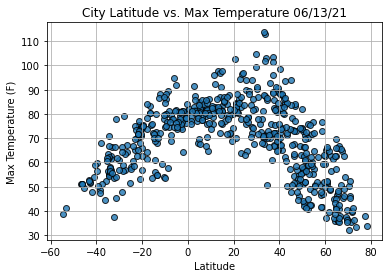

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

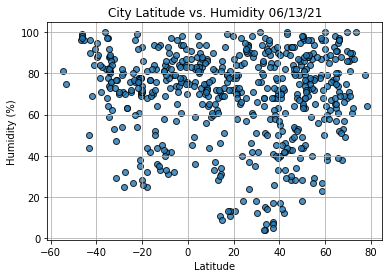

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

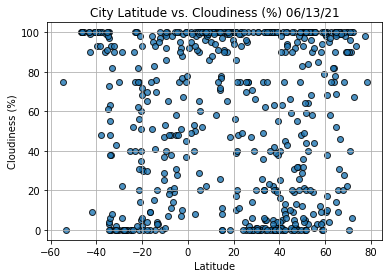

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

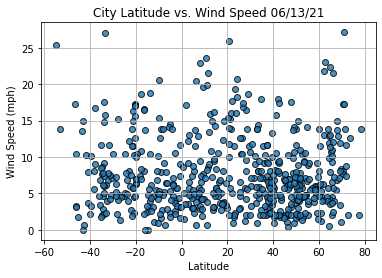

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()